In [30]:
import os
import pandas as pd
from torchvision.io import read_image

import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [61]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [66]:
dataset = CustomImageDataset(img_dir = 'img_dir', annotations_file = 'labels.csv', transform = transforms.Grayscale())

In [67]:
train_set, test_set = torch.utils.data.random_split(dataset, [15, 4]) # 15 - train set, 5 - test set, index


In [68]:
train_dataloader = DataLoader(train_set, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=2, shuffle=True)

Feature batch shape: torch.Size([2, 1, 50, 50])
Labels batch shape: torch.Size([2])
torch.Size([50, 50])


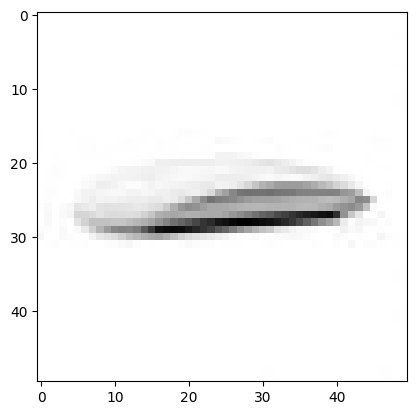

Label: 1


In [71]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]

print(img.shape)
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")